# First session: multilayer perceptron MLP

This practical will introduce you to the MNIST dataset as well 
as to tensorflow, google's open source framework for deep learning.
for more information about tensorflow visit : https://www.tensorflow.org/

In [56]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [79]:
help(input_data.read_data_sets)

Help on function read_data_sets in module tensorflow.contrib.learn.python.learn.datasets.mnist:

read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32)



The MNIST dataset is a set of greyscale images with 28*28=784 pixels.
Each image is a number between 0 and 9.
The goal of the practical is to obtain a classifier that can correctly 
classify the images into the 10 classes.
The MNIST data consists of 55000 train images and labels, 5000 observations
validation set and 10000 observations in the test set.
for more information about it visit : http://yann.lecun.com/exdb/mnist/

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Question 0.1: What is the first number of the training data? Why is the 
label a vector and not a number from 0 to 9 ? Plot the corresponding image.

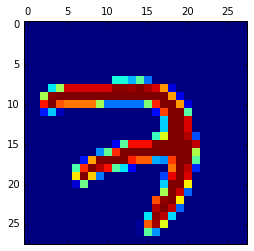

In [59]:
#Answer
mnist.train.labels[0,]
plt.matshow(np.reshape(mnist.train.images[0,],[28,28]))

1st part: Softmax regression
We are going to do the simplest possible neural network with no hidden
layers. So we have 28*28=784 input nodes and 10 output nodes.

Q1.1: What is the dimension of the model ?

Tensorflow relies on a highly efficient C++ backend to do its computation.
The connection to this backend is called a session. The common usage for 
TensorFlow programs is to first create a graph and then launch it in 
a session.

In [60]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])#input
W = tf.Variable(tf.zeros([784, 10]))#weights
b = tf.Variable(tf.zeros([10]))#bias

tf.matmul(x, W) + b defines the evidence supporting each class.
The softmax operator exponentiates the evidence and normalizes the vector
in order to obtain a probability distribution over the 10 classes.

Q1.2: Write this as a mathematical formula.

In [61]:
y = tf.nn.softmax(tf.matmul(x, W) + b)#predictions
y_ = tf.placeholder(tf.float32, [None, 10])#labels*


The objective funcion we will minimize is cross-entropy defined in the 
following line.

Q1.3: Write cross-entropy as a mathematical formula. Why do we use 
cross-entropy and not classification error ?

to get the answer, go to : https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

In [62]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Tensorflow has different optimizers already coded. So, no need to code 
gradient descent again.

In [64]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

You need to initialize variables.

In [65]:
init = tf.initialize_all_variables()

This is the session where calculations encoded in the graph will
take place.

In [70]:
sess = tf.Session()
sess.run(init)#initialisation

The training step is run 1000 times with mini-batches of 100 observations.

In [73]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

To evaluate the performance of the classifier, we use the following
three lines

In [74]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9183


Q1.4 Is there overfitting?

In [75]:
#answer
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))

0.917782


Q1.5: Visualize the weights used to classify as 0.

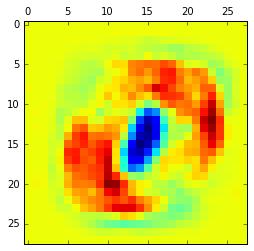

In [76]:
#answer
plt.matshow(np.reshape(sess.run(W)[:,0],[28,28]))

Q1.6: Plot the test error as a function of 
the number of iterations of gradient descent.

In [ ]:
#answer
acc_test=np.zeros(1000)
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  acc_test[i]=sess.run(accuracy,feed_dict={x: mnist.test.images,y_:mnist.test.labels})

plt.plot(acc_test)

close session

In [30]:
sess.close()

## exercise 2 : 
try to do the same thing with the Iris data.
https://archive.ics.uci.edu/ml/datasets/Iris
. you can also download it using the code below:

In [7]:
import numpy as np # if you didn't restart the kernel. numpy is already imported.
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# exercise 3:

On the mnist data, try and improve prediction accuracy by adding a hidden layer.